<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/03_pytorch_computer_vision.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=50417) 

# 03. PyTorch Computer Vision

[Computer vision](https://en.wikipedia.org/wiki/Computer_vision) is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog ([binary classification](https://developers.google.com/machine-learning/glossary#binary-classification)).

Or whether a photo is of a cat, dog or chicken ([multi-class classification](https://developers.google.com/machine-learning/glossary#multi-class-classification)).

Or identifying where a car appears in a video frame ([object detection](https://en.wikipedia.org/wiki/Object_detection)).

Or figuring out where different objects in an image can be separated ([panoptic segmentation](https://arxiv.org/abs/1801.00868)).

![example computer vision problems](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Example computer vision problems for binary classification, multiclass classification, object detection and segmentation.*

## Where does computer vision get used?

If you use a smartphone, you've already used computer vision.

Camera and photo apps use [computer vision to enhance](https://machinelearning.apple.com/research/panoptic-segmentation) and sort images.

Modern cars use [computer vision](https://youtu.be/j0z4FweCy4M?t=2989) to avoid other cars and stay within lane lines.

Manufacturers use computer vision to identify defects in various products.

Security cameras use computer vision to detect potential intruders.

In essence, anything that can described in a visual sense can be a potential computer vision problem.

## What we're going to cover

We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **4. Making predictions and evaluting model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictons on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## Where can can you get help?

All of the materials for this course [live on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions) there too.

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch. 

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

## 1. Getting a dataset

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST.

MNIST stands for Modified National Institute of Standards and Technology.

The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup. 

Except it contains grayscale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="dataset", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="dataset",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

Let's check out the first sample of the training data.

In [ ]:
# See first training sample
image, label = train_data[0]
image, label

### 1.1 Input and output shapes of a computer vision model

We've got a big tensor of values (the image) leading to a single value for the target (the label).

Let's see the image shape.

In [ ]:
# What's the shape of the image?
image.shape

The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.

![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
*Various problems will have various input and output shapes. But the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.*

If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known a the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice). 

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [ ]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

So we've got 60,000 training samples and 10,000 testing samples.

What classes are there?

We can find these via the `.classes` attribute.

In [ ]:
# See classes
class_names = train_data.classes
class_names

Sweet! It looks like we're dealing with 10 different kinds of clothes.

Because we're working with 10 different classes, it means our problem is **multi-class classification**.

Let's get visual.

### 1.2 Visualizing our data

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

We can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Beautiful, well as beautiful as a pixelated grayscale ankle boot can get.

Let's view a few more.

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

Hmmm, this dataset doesn't look too aesthetic.

But the principles we're going to learn on how to build a model for it will be similar across a wide range of computer vision problems.

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.

Plus, even for this small dataset (yes, even 60,000 images in deep learning is considered quite small), could you write a program to classify each one of them?

You probably could.

But I think coding a model in PyTorch would be faster.

> **Question:** Do you think the above data can be model with only straight (linear) lines? Or do you think you'd also need non-straight (non-linear) lines?

## 2. Prepare DataLoader

Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Let's create `DataLoader`'s for our training and test sets. 

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

And we can see that the data remains unchanged by checking a single sample. 

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

Data loaded and prepared!

Time to build a **baseline model** by subclassing `nn.Module`.

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers.

We've done this in a previous section but there's going to one slight difference.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

This is easier to understand when you see it.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Why do this?

Because we've now turned our pixel data from height and width dimensions into one long **feature vector**.

And `nn.Linear()` layers like their inputs to be in the form of feature vectors.

Let's create our first model using `nn.Flatten()` as the first layer. 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

Wonderful!

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [ ]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

### 3.1 Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring in our [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) and subsequently the `accuracy_fn()` we defined in [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/).

> **Note:** Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the [TorchMetrics package](https://torchmetrics.readthedocs.io/en/latest/).

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Loss function and optimizer ready!

It's time to start training a model.

But how about we do a little experiment while we train.

I mean, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the [`timeit.default_timer()` function](https://docs.python.org/3/library/timeit.html#timeit.default_timer) from the Python [`timeit` module](https://docs.python.org/3/library/timeit.html).

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

Beautiful!

Looks like we've got all of the pieces of the puzzle ready to go, a timer, a loss function, an optimizer, a model and most importantly, some data.

Let's now create a training loop and a testing loop to train and evaluate our model.

We'll be using the same steps as the previous notebook(s), though since our data is now in batch form, we'll add another loop to loop through our data batches.

Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader. 

Let's step through it: 
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

A fair few steps but...

...if in doubt, code it out. 

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

Nice! Looks like our baseline model did fairly well.

It didn't take too long to train either, even just on the CPU, I wonder if it'll speed up on the GPU?

Let's write some code to evaluate our model.

## 4. Make predictions and get Model 0 results

Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

Looking good!

We can use this dictionary to compare the baseline model results to other models later on.

## 5. Setup device agnostic-code (for using a GPU if there is one)
We've seen how long it takes to train ma PyTorch model on 60,000 samples on CPU.

> **Note:** Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) for our models and data to run on GPU if it's available.

If you're running this notebook on Google Colab, and you don't a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going `Runtime -> Run before`.

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

Beautiful!

Let's build another model.

## 6. Model 1: Building a better model with non-linearity

We learned about [the power of non-linearity in notebook 02](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity).

Seeing the data we've been working with, do you think it needs non-linear functions?

And remember, linear means straight and non-linear means non-straight.

Let's find out.

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

That looks good.

Now let's instantiate it with the same settings we used before.

We'll need `input_shape=784` (equal to the number of features of our image data), `hidden_units=10` (starting small and the same as our baseline model) and `output_shape=len(class_names)` (one output unit per class).

> **Note:** Notice how we kept most of the settings of our model the same except for one change: adding non-linear layers. This is a standard practice for running a series of machine learning experiments, change one thing and see what happens, then do it again, again, again.

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

### 6.1 Setup loss, optimizer and evaluation metrics

As usual, we'll setup a loss function, an optimizer and an evaluation metric (we could do multiple evaluation metrics but we'll stick with accuracy for now).

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

### 6.2 Functionizing training and test loops

So far we've been writing train and test loops over and over. 

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

Woohoo!

Now we've got some functions for training and testing our model, let's run them.

We'll do so inside another loop for each epoch.

That way for each epoch we're going a training and a testing step.

> **Note:** You can customize how often you do a testing step. Sometimes people do them every five epochs or 10 epochs or in our case, every epoch.

Let's also time things to see how long our code takes to run on the GPU.

In [ ]:
model_0_results


In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

Excellent!

Our model trained but the training time took longer?

> **Note:** The training time on CUDA vs CPU will depend largely on the quality of the CPU/GPU you're using. Read on for a more explained answer.

> **Question:** "I used a a GPU but my model didn't train faster, why might that be?"
>
> **Answer:** Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.
> 
> There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.
>
> So for smaller models and datasets, the CPU might actually be the optimal place to compute on.
>
> But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.
>
> However, this is largely dependant on the hardware you're using. With practice, you will get used to where the best place to train your models is. 

Let's evaluate our trained `model_1` using our `eval_model()` function and see how it went.

In [ ]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

Oh no! 

It looks like our `eval_model()` function errors out with:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

It's because we've setup our data and model to use device-agnostic code but not our evaluation function.

How about we fix that by passing a target `device` parameter to our `eval_model()` function?

Then we'll try calculating the results again.

In [ ]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

In [ ]:
# Check baseline results
model_0_results

In [151]:
##Model 2: buuildin a cnn #also known as convnets known for fidin patterns in visual datat
class FashionMNISTModelV2(nn.Module):
    """
    Model architrecure tha t replicates the tinyVGG
    mddel from CNN explainers website https://poloclub.github.io/cnn-explainer/
    """

    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            #create a conv layer
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), #values wew can set ourselfs are called hyperparameters called nn conv2d
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),    
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)          
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
                     
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)   
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,#there is a trick to calculate this!
                      out_features=output_shape),
            
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        # print("output shape of conv layer 1",x.shape)
        x = self.conv_block_2(x)
        # print("output shape fp conv layer 2",x.shape)
        x = self.classifier(x)
        # print("output of classifier layer", x.shape)
        return x



In [152]:
image.shape

torch.Size([1, 28, 28])

In [153]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [154]:
#stepping thourgh nn.conv2d()layer see the docs for nn.conv2d()
torch.manual_seed(42)
#create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [155]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [156]:
#create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),#3-> (3,3)
                       stride=2,
                       padding=1)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 32, 32])

In [157]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [158]:
conv_output.shape

torch.Size([1, 10, 32, 32])

In [159]:
#stepping htoruugh nn.maxpool2d()
#print out hte origin iamge shape wihtut unsqueezed dimension
print(f"Test iage original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass data thorugh just the conv layer first
test_image_thru_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv_layer: {test_image_thru_conv.shape}")

#paass image thourhg the max pool player
test_image_thru_conv_and_maxpool = max_pool_layer(test_image_thru_conv)
print(f"shape after conv and max pool: {test_image_thru_conv_and_maxpool.shape}")

Test iage original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
shape after going through conv_layer: torch.Size([1, 10, 32, 32])
shape after conv and max pool: torch.Size([1, 10, 16, 16])


In [160]:
torch.manual_seed(42)
#creating a random tensor with a similar number  of dimension to our image
random_tensor = torch.randn(size=(1,1,2,2))
print(f"randon tensor: {random_tensor}")
print(f"random tensor shape: {random_tensor.shape}")
#create a maxo=poll layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass radom tensor

max_pool_tensor = max_pool_layer(random_tensor)
print(f"max pool tensor: {max_pool_tensor}")
print(f"max pool tensor shape: {max_pool_tensor.shape}")

randon tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape: torch.Size([1, 1, 2, 2])
max pool tensor: tensor([[[[0.3367]]]])
max pool tensor shape: torch.Size([1, 1, 1, 1])


In [161]:
# plt.imshow(image.squeeze(), cmap='gray')

In [162]:
torch.manual_seed(42)
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [163]:
model_2(rand_image_tensor.unsqueeze(dim=0).to(device=device))

tensor([[ 0.0505, -0.0729,  0.0821, -0.0451, -0.0044,  0.0383,  0.0061, -0.0016,
         -0.0127, -0.0081]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [164]:
## setup a loss functoin and optimzer and eval matrix for model_2
from helper_functions import accuracy_fn 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [165]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [166]:
#using traina nd test stept o train model_2
from timeit import default_timer as Timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,end=train_time_end_model_2,device=device)
    


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59295 | Train accuracy: 78.50%


 33%|███▎      | 1/3 [00:15<00:31, 15.53s/it]

Test loss: 0.40282 | Test accuracy: 85.56%

Epoch: 1
-------
Train loss: 0.35823 | Train accuracy: 87.07%


 67%|██████▋   | 2/3 [00:29<00:14, 14.75s/it]

Test loss: 0.35277 | Test accuracy: 86.89%

Epoch: 2
-------
Train loss: 0.32180 | Train accuracy: 88.28%


100%|██████████| 3/3 [00:44<00:00, 14.95s/it]

Test loss: 0.32165 | Test accuracy: 88.68%

Train time on cuda: 44.860 seconds


In [168]:
#getting model_2 resits
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32165101170539856,
 'model_acc': 88.67811501597444}

In [169]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [170]:
## compare model results and training time
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.658027,75.918530
2,FashionMNISTModelV2,0.321651,88.678115


In [172]:
## add traiing time ot results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,31.938494
1,FashionMNISTModelV1,0.658027,75.918530,28.959467
2,FashionMNISTModelV2,0.321651,88.678115,44.859921


Text(0, 0.5, 'model')

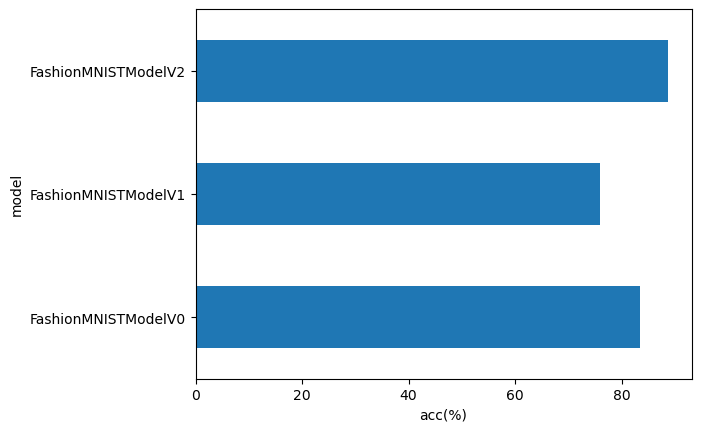

In [173]:
# visualize our reutls
compare_results.set_index("model_name")['model_acc'].plot(kind="barh")
plt.xlabel("acc(%)")
plt.ylabel('model')

In [175]:
##make and evalutate random predictions with the best model (v2)
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            #forward pass model (out put is raw logits)
            pred_logit = model(sample)

            #get pred prob (logit-> pred prob)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            #get pred_prob off the GPU into cpu
            pred_probs.append(pred_prob.cpu())
        
    return torch.stack(pred_probs)


In [176]:
img, label = train_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [182]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

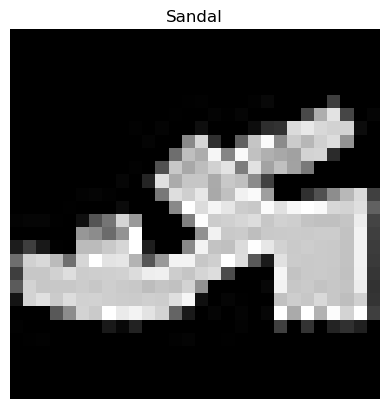

In [186]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.axis(False)
plt.title(class_names[test_labels[0]])

In [187]:
#make preds
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

#view first two preds probabilities
pred_probs[:2]

tensor([[8.2393e-09, 1.5792e-09, 6.1839e-09, 3.4971e-08, 2.3291e-09, 9.9992e-01,
         2.9835e-07, 1.4496e-06, 3.1305e-06, 7.2656e-05],
        [4.5323e-02, 7.0797e-01, 3.0791e-03, 1.2462e-01, 2.8577e-02, 1.7509e-04,
         8.9647e-02, 1.7850e-04, 3.8153e-04, 5.2454e-05]])

In [193]:
#convert pred prob into labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [189]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

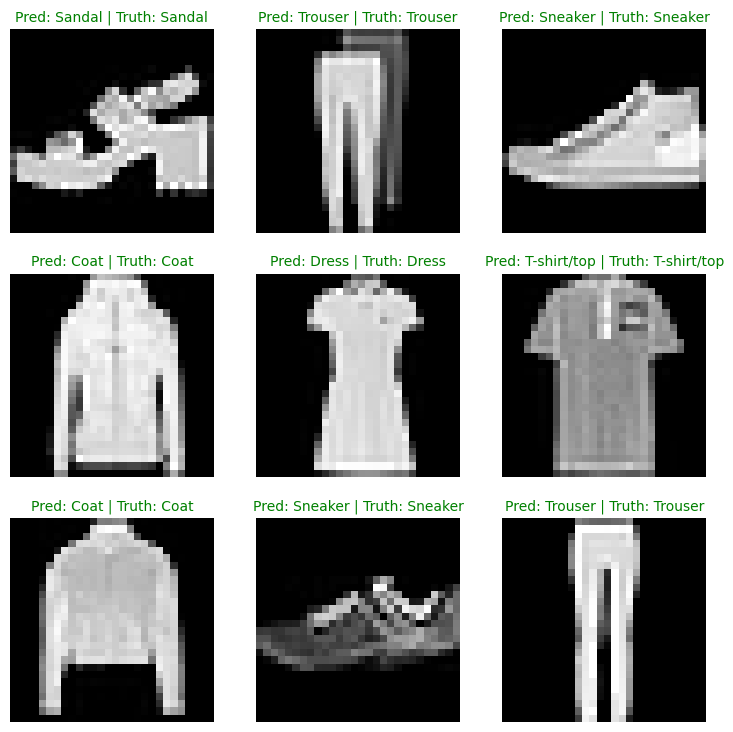

In [196]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    #plot the target image
    plt.imshow(sample.squeeze(), cmap = 'gray')

    #find the predictino(in text form,  eg "sandal")
    pred_label = class_names[pred_classes[i]]

    #get the trigth label(in text form)

    truth_label = class_names[test_labels[i]]

    #create a title for the plot 
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    plt.axis(False)
    #check or equality between red and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text,fontsize=10,c='g')
    else:
        plt.title(title_text,fontsize=10,c='r')


In [ ]:
#plotting a confusion matrix
from torchmetrics import ConfusionMatrix
#make preds with our trained model on the test dataset
#make a confusion matrix using torchmetrics.ConfusionMatrix
#plot athe confusion matrix using `mlxtend.plotting.plot_confusion_matrix`

In [198]:
from tqdm.auto import tqdm
#make preds iwth traininged mod
model_2.eval()
y_preds = []
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="making preds...."):
        X,y = X.to(device), y.to(device)
        #forward pass
        y_logit = model_2(X).squeeze() #raw output of a model with linear layer at the end
        #turn logits to pred probs to labels
        y_pred_prob = torch.softmax(y_logit, dim=0)
        y_pred_label = y_pred_prob.argmax(dim=1)
        #put preds on CPU for eval
        y_preds.append(y_pred_label.cpu())

#calc list of preds into atensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]




making preds....: 100%|██████████| 313/313 [00:01<00:00, 249.02it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [199]:
len(y_pred_tensor)

10000

In [201]:
#see if required pacakges are installed if not install them
try:
    import torchmetrics
except:
    %pip install torchmetrics
    import torchmetrics

In [204]:
test_data.targets
test_data.classes
test_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [219]:
from torchmetrics import ConfusionMatrix

#setup confsion matrix instance and comapre preds to targets

confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
confmat_tensor



tensor([[621,   5,  56,  67,  12,   0, 231,   0,   8,   0],
        [  8, 873,   8,  91,  14,   0,   5,   0,   1,   0],
        [  7,   1, 817,  11,  97,   0,  65,   0,   2,   0],
        [ 20,  10,  30, 847,  50,   0,  36,   0,   5,   2],
        [  4,   4, 111,  37, 754,   0,  86,   0,   4,   0],
        [  6,   2,   4,   5,   1, 829,   2,  62,  64,  25],
        [ 62,   7, 125,  56,  91,   0, 651,   0,   8,   0],
        [  0,   0,   0,   0,   0,  23,   0, 917,  10,  50],
        [  4,   1,  26,  11,  12,   5,  43,   7, 890,   1],
        [  0,   0,   1,   3,   0,  16,   2,  95,   9, 874]])

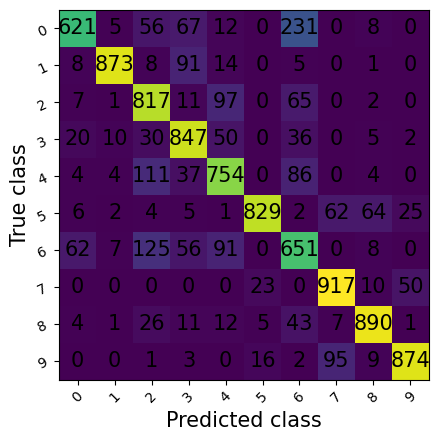

In [220]:
#plot the confusion matrics
fig_, ax_ = confmat.plot()


In [222]:
#saving and load our moodel!!!
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)
MODEL_NAME = "04_pytorch_cv_model2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
#save the model statedict
print(F"saving hte model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

saving hte model to : models/04_pytorch_cv_model2.pth


In [224]:
#create a new instance of the model (LAODING)
torch.manual_seed(42)
loaded_model2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=10)
loaded_model2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#sending hte model to target device
loaded_model2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [225]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32165101170539856,
 'model_acc': 88.67811501597444}

In [226]:
#evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32165101170539856,
 'model_acc': 88.67811501597444}

In [227]:
#check if model results are close to eacch other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-3)


tensor(True)